# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Esa Maidatussohiba
- **Email:** esamaida44@gmail.com
- **ID Dicoding:** Esa Maidatussohiba

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca mempengaruhi jumlah peminjaman sepeda?
- Kapan waktu puncak peminjaman sepeda terjadi?
- Bagaimana pola penggunaan sepeda berdasarkan hari kerja vs hari libur?

## Import Semua Packages/Library yang Digunakan

In [39]:
import pandas as pd
data = pd.read_csv('/content/day.csv')  # membaca file CSV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


## Data Wrangling

### Gathering Data

In [2]:

# Load dataset
df = pd.read_csv('/content/day.csv')  # Sesuaikan path dengan lokasi file data kamu

# Pilih kolom yang relevan
cuaca_df = df[['temp', 'atemp', 'hum', 'windspeed', 'weathersit', 'cnt']]

# Urutkan DataFrame berdasarkan nilai 'cnt' dari yang terbesar
cuaca_df_sorted = cuaca_df.sort_values(by='cnt', ascending=False)

# Tampilkan 5 data pertama setelah diurutkan
print(cuaca_df_sorted.head())

         temp     atemp       hum  windspeed  weathersit   cnt
623  0.608333  0.585867  0.501667   0.247521           1  8714
637  0.542500  0.530296  0.542917   0.227604           1  8555
630  0.650000  0.610488  0.646667   0.283583           1  8395
447  0.601667  0.570067  0.694167   0.116300           2  8362
504  0.600000  0.566908  0.456250   0.083975           1  8294


In [3]:
# Load dataset hourly analisis per jam
df_hourly = pd.read_csv('/content/hour.csv')

# Pilih kolom yang relevan
waktu_puncak_df = df_hourly[['hr', 'weekday', 'cnt', 'workingday']]

# Tampilkan 5 data pertama
print(waktu_puncak_df.head())

   hr  weekday  cnt  workingday
0   0        6   16           0
1   1        6   40           0
2   2        6   32           0
3   3        6   13           0
4   4        6    1           0


In [4]:
# kolom yang relevan
musim_df = df[['season', 'yr', 'cnt']]

# Tampilkan 5 data pertama
print(musim_df.head())

   season  yr   cnt
0       1   0   985
1       1   0   801
2       1   0  1349
3       1   0  1562
4       1   0  1600


**Insight:**
- Data cuaca (cuaca_df) akan memuat informasi tentang
  suhu, kelembaban, kecepatan angin, dan kondisi cuaca, yang bisa digunakan untuk analisis hubungan cuaca dengan jumlah peminjaman.
- Data waktu puncak (waktu_puncak_df) akan memuat jam,
  hari dalam seminggu, dan total peminjaman, untuk mengidentifikasi waktu-waktu sibuk.
- Data musim (musim_df) akan memuat musim dan total
  peminjaman, sehingga kita bisa melihat tren peminjaman sepanjang tahun.

### Assessing Data

In [ ]:
# Cek missing values
print(cuaca_df.isnull().sum())

# Cek tipe data
print(cuaca_df.dtypes)

#cek data duplikat
print("Jumlah duplikasi: ", cuaca_df.duplicated().sum())

# Deskripsi data untuk mengetahui distribusi nilai
print(cuaca_df.describe())

temp          0
atemp         0
hum           0
windspeed     0
weathersit    0
cnt           0
dtype: int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
weathersit      int64
cnt             int64
dtype: object
Jumlah duplikasi:  0
             temp       atemp         hum   windspeed  weathersit          cnt
count  731.000000  731.000000  731.000000  731.000000  731.000000   731.000000
mean     0.495385    0.474354    0.627894    0.190486    1.395349  4504.348837
std      0.183051    0.162961    0.142429    0.077498    0.544894  1937.211452
min      0.059130    0.079070    0.000000    0.022392    1.000000    22.000000
25%      0.337083    0.337842    0.520000    0.134950    1.000000  3152.000000
50%      0.498333    0.486733    0.626667    0.180975    1.000000  4548.000000
75%      0.655417    0.608602    0.730209    0.233214    2.000000  5956.000000
max      0.861667    0.840896    0.972500    0.507463    3.000000  8714.000000



Outliers in temp:
Series([], Name: temp, dtype: float64)

Outliers in atemp:
Series([], Name: atemp, dtype: float64)

Outliers in hum:
49    0.187917
68    0.000000
Name: hum, dtype: float64

Outliers in windspeed:
44     0.417908
49     0.507463
93     0.385571
94     0.388067
292    0.422275
382    0.415429
407    0.409212
420    0.421642
432    0.441563
433    0.414800
450    0.386821
666    0.398008
721    0.407346
Name: windspeed, dtype: float64

Outliers in weathersit:
Series([], Name: weathersit, dtype: int64)

Outliers in cnt:
Series([], Name: cnt, dtype: int64)


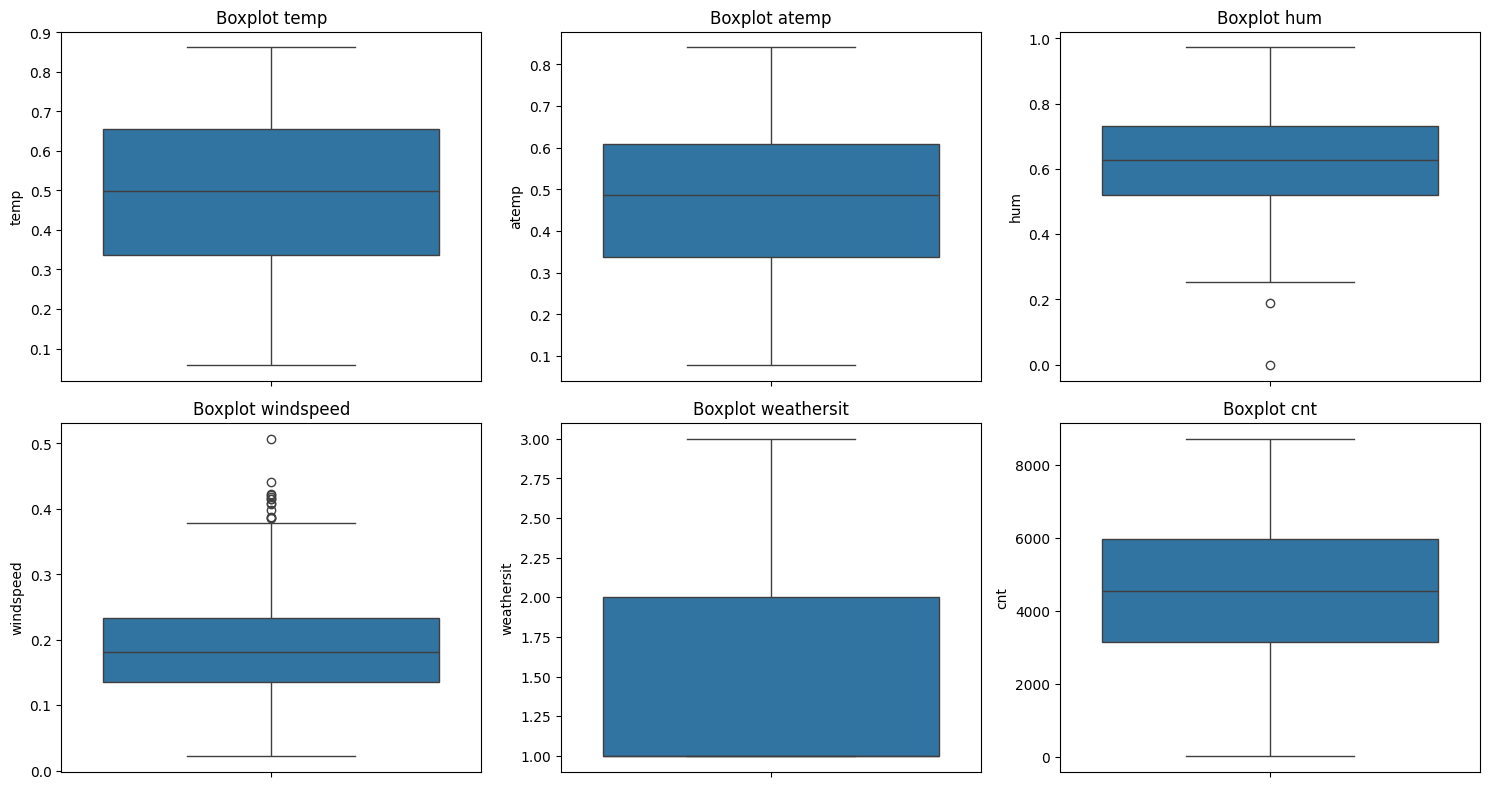

In [ ]:
#cek outlier untuk cuaca_df

def detect_outliers_iqr(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)  # Kuartil pertama (25%)
        Q3 = df[column].quantile(0.75)  # Kuartil ketiga (75%)
        IQR = Q3 - Q1  # Interquartile Range

        lower_bound = Q1 - 1.5 * IQR  # Batas bawah
        upper_bound = Q3 + 1.5 * IQR  # Batas atas

        # Mendapatkan nilai yang berada di luar range tersebut (outliers)
        outliers_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        outliers[column] = outliers_in_column

    return outliers

# Deteksi outliers dalam dataset cuaca_df
outliers = detect_outliers_iqr(cuaca_df)

# Print hasil deteksi outliers
for column, outlier_values in outliers.items():
    print(f"\nOutliers in {column}:")
    print(outlier_values)

# Visualisasi outliers menggunakan boxplot
plt.figure(figsize=(15, 8))
for i, column in enumerate(cuaca_df.columns, 1):
    plt.subplot(2, 3, i)  # Membuat 6 plot dalam 1 grid
    sns.boxplot(data=cuaca_df[column])
    plt.title(f'Boxplot {column}')

plt.tight_layout()
plt.show()

In [ ]:
# Cek missing values
print(waktu_puncak_df.isnull().sum())

# Cek rentang nilai hr dan weekday
print(waktu_puncak_df['hr'].unique())  # Seharusnya 0-23
print(waktu_puncak_df['weekday'].unique())  # Seharusnya 0-6

#cek duplikasi data
print("Jumlah duplikasi: ", waktu_puncak_df.duplicated().sum())

# Deskripsi data untuk mengetahui distribusi nilai
print(waktu_puncak_df.describe())



hr            0
weekday       0
cnt           0
workingday    0
dtype: int64
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[6 0 1 2 3 4 5]
Jumlah duplikasi:  4602
                 hr       weekday           cnt    workingday
count  17379.000000  17379.000000  17379.000000  17379.000000
mean      11.546752      3.003683    189.463088      0.682721
std        6.914405      2.005771    181.387599      0.465431
min        0.000000      0.000000      1.000000      0.000000
25%        6.000000      1.000000     40.000000      0.000000
50%       12.000000      3.000000    142.000000      1.000000
75%       18.000000      5.000000    281.000000      1.000000
max       23.000000      6.000000    977.000000      1.000000


Jumlah outlier di 'cnt': 505
Outlier pada 'cnt':
5536     651
10358    644
10359    712
10382    676
10383    734
        ... 
16885    724
16909    688
16933    679
17053    662
17077    678
Name: cnt, Length: 505, dtype: int64


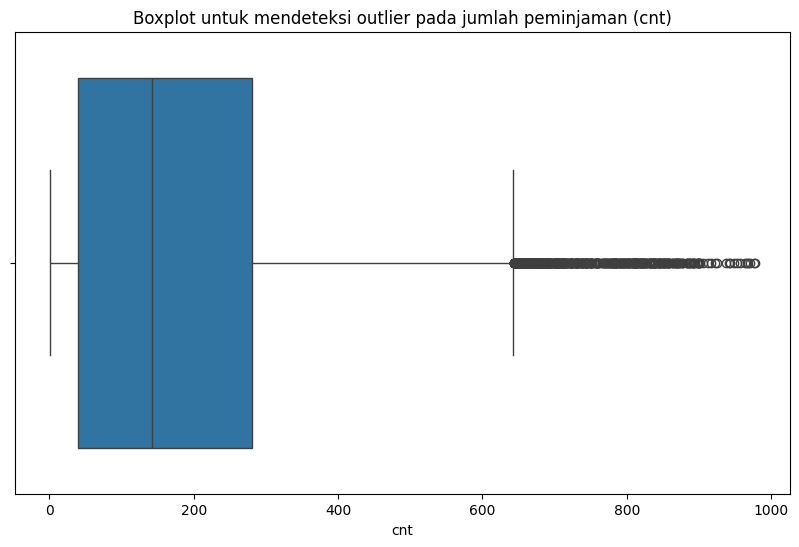

Jumlah outlier di 'hr': 0
Outlier pada 'hr':
Series([], Name: hr, dtype: int64)


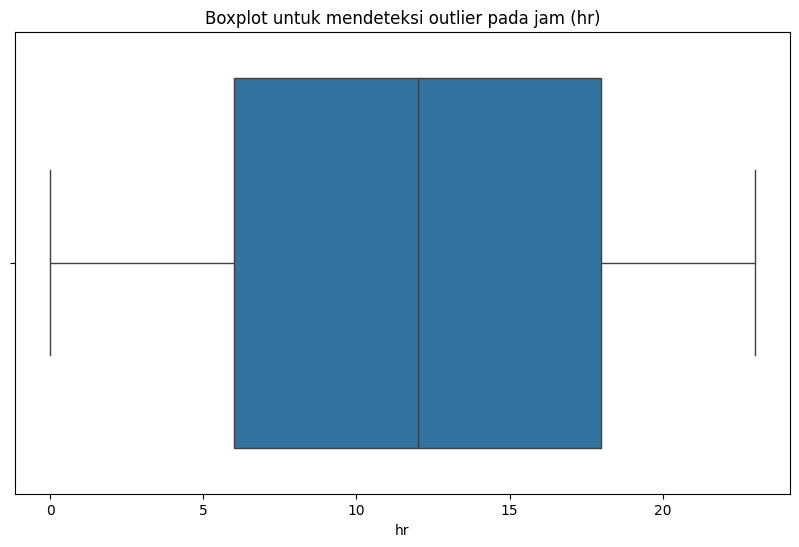

Jumlah outlier di 'weekday': 0
Outlier pada 'weekday':
Series([], Name: weekday, dtype: int64)


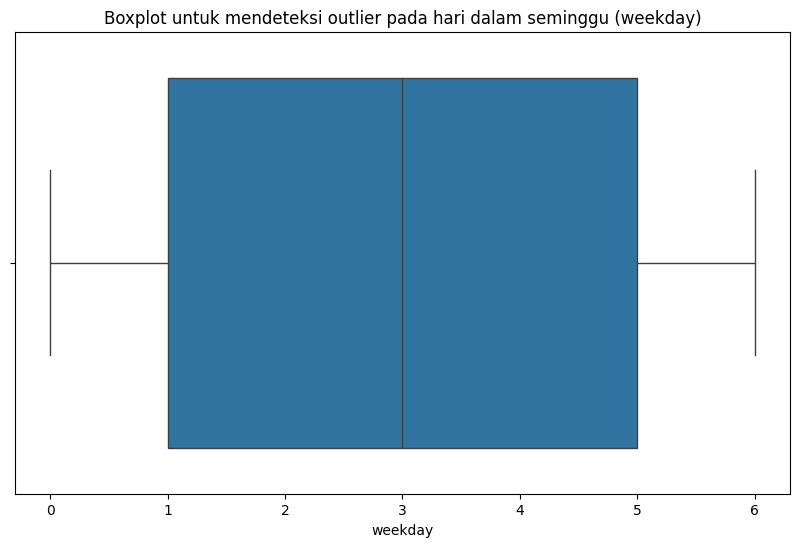

In [ ]:

# Fungsi untuk mendeteksi dan menghitung outlier menggunakan IQR
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Cek outlier di 'cnt'
outliers_cnt = detect_outliers(waktu_puncak_df['cnt'])
print(f"Jumlah outlier di 'cnt': {len(outliers_cnt)}")
print("Outlier pada 'cnt':")
print(outliers_cnt)

# Visualisasi boxplot untuk mendeteksi outlier pada kolom 'cnt'
plt.figure(figsize=(10, 6))
sns.boxplot(x=waktu_puncak_df['cnt'])
plt.title('Boxplot untuk mendeteksi outlier pada jumlah peminjaman (cnt)')
plt.show()

# Cek outlier di 'hr'
outliers_hr = detect_outliers(waktu_puncak_df['hr'])
print(f"Jumlah outlier di 'hr': {len(outliers_hr)}")
print("Outlier pada 'hr':")
print(outliers_hr)

# Visualisasi boxplot untuk mendeteksi outlier pada kolom 'hr'
plt.figure(figsize=(10, 6))
sns.boxplot(x=waktu_puncak_df['hr'])
plt.title('Boxplot untuk mendeteksi outlier pada jam (hr)')
plt.show()

# Cek outlier di 'weekday'
outliers_weekday = detect_outliers(waktu_puncak_df['weekday'])
print(f"Jumlah outlier di 'weekday': {len(outliers_weekday)}")
print("Outlier pada 'weekday':")
print(outliers_weekday)

# Visualisasi boxplot untuk mendeteksi outlier pada kolom 'weekday'
plt.figure(figsize=(10, 6))
sns.boxplot(x=waktu_puncak_df['weekday'])
plt.title('Boxplot untuk mendeteksi outlier pada hari dalam seminggu (weekday)')
plt.show()


In [ ]:
# Cek missing values
print(musim_df.isnull().sum())

# Cek nilai yang unik di kolom season dan yr
print(musim_df['season'].unique())  # Seharusnya 1-4
print(musim_df['yr'].unique())  # Seharusnya 0 atau 1

#cek duplikasi data
print("Jumlah duplikasi: ", musim_df.duplicated().sum())

# Deskripsi data untuk mengetahui distribusi nilai
print(musim_df.describe())

season    0
yr        0
cnt       0
dtype: int64
[1 2 3 4]
[0 1]
Jumlah duplikasi:  4
           season          yr          cnt
count  731.000000  731.000000   731.000000
mean     2.496580    0.500684  4504.348837
std      1.110807    0.500342  1937.211452
min      1.000000    0.000000    22.000000
25%      2.000000    0.000000  3152.000000
50%      3.000000    1.000000  4548.000000
75%      3.000000    1.000000  5956.000000
max      4.000000    1.000000  8714.000000


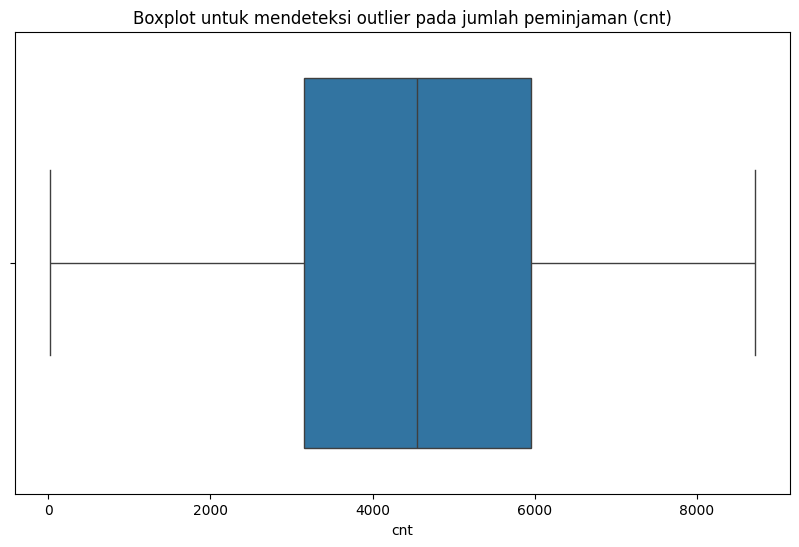

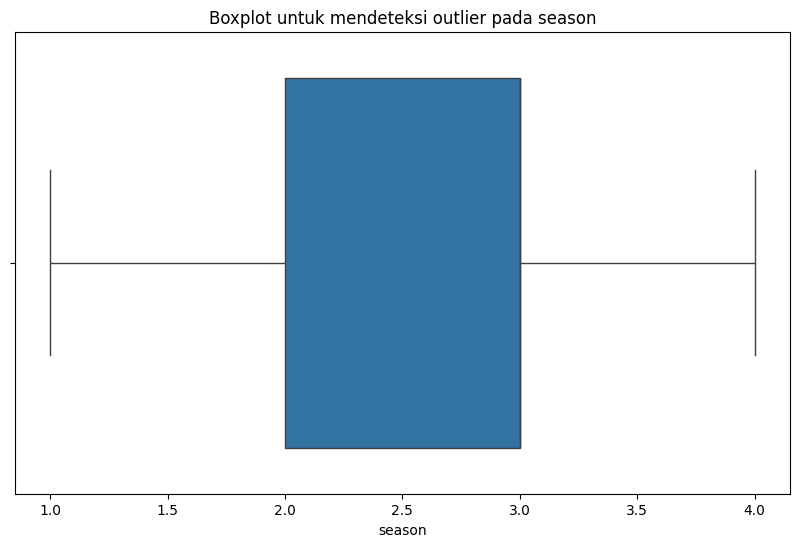

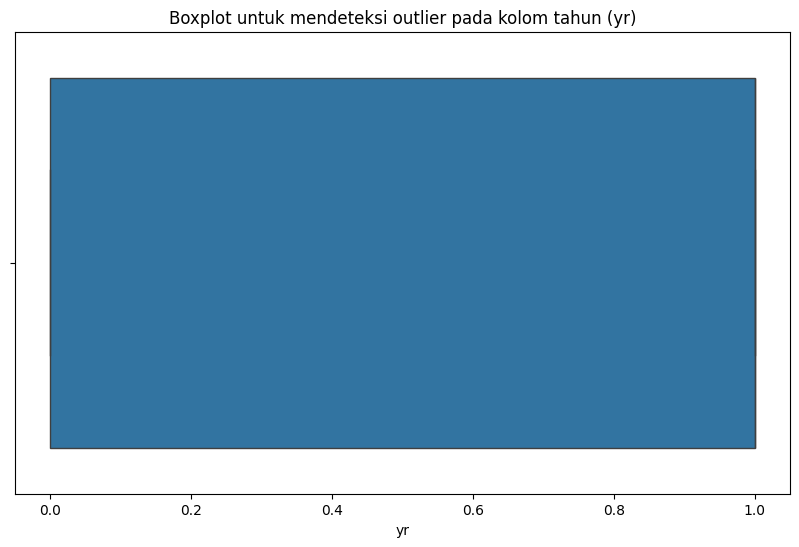

In [ ]:
# Visualisasi boxplot untuk mendeteksi outlier pada kolom 'cnt'
plt.figure(figsize=(10, 6))
sns.boxplot(x=musim_df['cnt'])
plt.title('Boxplot untuk mendeteksi outlier pada jumlah peminjaman (cnt)')
plt.show()

# Visualisasi boxplot untuk kolom 'season' jika diperlukan
plt.figure(figsize=(10, 6))
sns.boxplot(x=musim_df['season'])
plt.title('Boxplot untuk mendeteksi outlier pada season')
plt.show()

# Visualisasi boxplot untuk kolom 'yr' jika diperlukan
plt.figure(figsize=(10, 6))
sns.boxplot(x=musim_df['yr'])
plt.title('Boxplot untuk mendeteksi outlier pada kolom tahun (yr)')
plt.show()

**Insight:**
- cuaca_df : terdapat outlier di hum=2 dan windspreed=13
- waktu_puncak : terdapat duplikasi data=4602 dan outlier kolom cnt=550
- musim_df : terdapat duplikasi data= 4

### Cleaning Data

In [5]:

#cleaning data outlier pada hum dan windspeed


# fungsi untuk cap/floor outliers untuk menjadi median
def cap_outliers_with_median(df, column, lower_bound, upper_bound):
    median_value = df[column].median()
    df.loc[df[column] < lower_bound, column] = median_value
    df.loc[df[column] > upper_bound, column] = median_value

# menjumlahkan outlier di hum dan windspeed
Q1_hum = cuaca_df['hum'].quantile(0.25)
Q3_hum = cuaca_df['hum'].quantile(0.75)
IQR_hum = Q3_hum - Q1_hum
lower_bound_hum = Q1_hum - 1.5 * IQR_hum
upper_bound_hum = Q3_hum + 1.5 * IQR_hum

Q1_windspeed = cuaca_df['windspeed'].quantile(0.25)
Q3_windspeed = cuaca_df['windspeed'].quantile(0.75)
IQR_windspeed = Q3_windspeed - Q1_windspeed
lower_bound_windspeed = Q1_windspeed - 1.5 * IQR_windspeed
upper_bound_windspeed = Q3_windspeed + 1.5 * IQR_windspeed

# Capping outliers in 'hum'
cap_outliers_with_median(cuaca_df, 'hum', lower_bound_hum, upper_bound_hum)

# Capping outliers in 'windspeed'
cap_outliers_with_median(cuaca_df, 'windspeed', lower_bound_windspeed, upper_bound_windspeed)

# Verifying the changes
print("\nOutliers in hum after handling:")
print(cuaca_df[(cuaca_df['hum'] < lower_bound_hum) | (cuaca_df['hum'] > upper_bound_hum)])

print("\nOutliers in windspeed after handling:")
print(cuaca_df[(cuaca_df['windspeed'] < lower_bound_windspeed) | (cuaca_df['windspeed'] > upper_bound_windspeed)])



Outliers in hum after handling:
Empty DataFrame
Columns: [temp, atemp, hum, windspeed, weathersit, cnt]
Index: []

Outliers in windspeed after handling:
Empty DataFrame
Columns: [temp, atemp, hum, windspeed, weathersit, cnt]
Index: []


In [13]:
# checking Outliers di windspeed berdasarkan hasil sebelumnya
windspeed_outliers_index = [238, 377, 693, 720]

# Hapus baris yang memiliki outliers di windspeed
cuaca_df_cleaned = cuaca_df.drop(windspeed_outliers_index)

# Verifikasi bahwa outlier di windspeed telah dihapus
outliers_after_removal = detect_outliers_iqr(cuaca_df_cleaned)
print("\nOutliers in windspeed setelah dihapus:")
print(outliers_after_removal['windspeed'])

# Tampilkan dataset setelah pembersihan
print("\nDataset setelah penghapusan outliers:")
print(cuaca_df_cleaned.head())



Outliers in windspeed setelah dihapus:
Series([], Name: windspeed, dtype: float64)

Dataset setelah penghapusan outliers:
       temp     atemp       hum  windspeed  weathersit   cnt
0  0.344167  0.363625  0.805833   0.160446           2   985
1  0.363478  0.353739  0.696087   0.248539           2   801
2  0.196364  0.189405  0.437273   0.248309           1  1349
3  0.200000  0.212122  0.590435   0.160296           1  1562
4  0.226957  0.229270  0.436957   0.186900           1  1600


In [14]:
#cleaning data duplikat pada waktu_puncak_df
# Assuming waktu_puncak_df is the DataFrame with your data

# Checking for duplicates again to confirm
print("Jumlah duplikasi sebelum dihapus: ", waktu_puncak_df.duplicated().sum())

# Remove duplicate rows
waktu_puncak_df_cleaned = waktu_puncak_df.drop_duplicates()

# Confirming if the duplicates were removed
print("Jumlah duplikasi setelah dihapus: ", waktu_puncak_df_cleaned.duplicated().sum())

# Verify the shape of the cleaned data
print(f"Jumlah baris setelah duplikasi dihapus: {waktu_puncak_df_cleaned.shape[0]}")

Jumlah duplikasi sebelum dihapus:  4602
Jumlah duplikasi setelah dihapus:  0
Jumlah baris setelah duplikasi dihapus: 12777


Jumlah outlier setelah capping di 'cnt': 0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


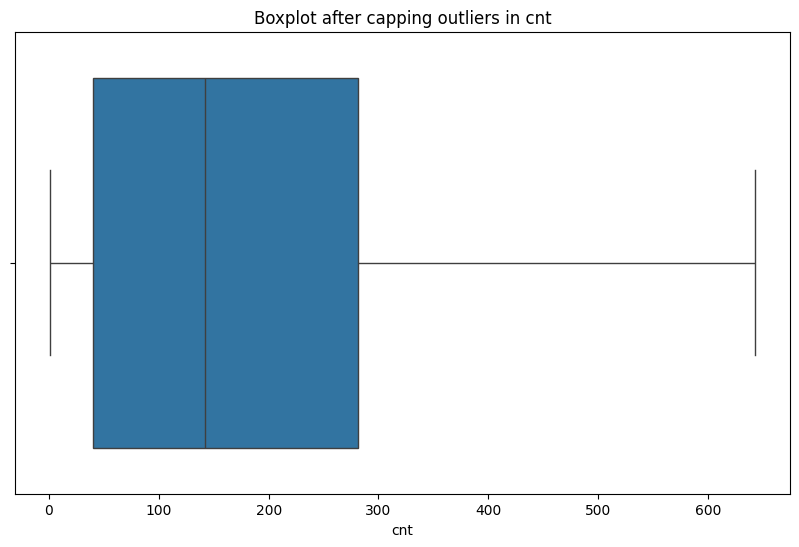

In [15]:
#CLEANING DATA pada outlier di cnt

# Function to detect outliers using the IQR method
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]  # Get outliers
    return outliers, lower_bound, upper_bound

# Detecting outliers in 'cnt'
outliers_cnt, lower_bound_cnt, upper_bound_cnt = detect_outliers(waktu_puncak_df['cnt'])

# Create a new DataFrame with capped outliers
waktu_puncak_df_cleaned = waktu_puncak_df.copy()

# Capping outliers in 'cnt'
waktu_puncak_df_cleaned['cnt'] = waktu_puncak_df_cleaned['cnt'].clip(upper=upper_bound_cnt)

# Check if outliers are capped
outliers_after_capping, _, _ = detect_outliers(waktu_puncak_df_cleaned['cnt'])
print(f"Jumlah outlier setelah capping di 'cnt': {len(outliers_after_capping)}")

# Visualize the result with a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=waktu_puncak_df_cleaned['cnt'])
plt.title('Boxplot after capping outliers in cnt')
plt.show()


In [16]:
# CLEANING DATA duplikat pada musim_df
# Remove duplicate data
musim_df_cleaned = musim_df.drop_duplicates()

# cek kembali data setelah cleaning
print("Jumlah duplikasi setelah dihapus: ", musim_df_cleaned.duplicated().sum())

# Describe the cleaned data
print(musim_df_cleaned.describe())

Jumlah duplikasi setelah dihapus:  0
           season          yr          cnt
count  727.000000  727.000000   727.000000
mean     2.497937    0.503439  4508.403026
std      1.110771    0.500332  1938.302298
min      1.000000    0.000000    22.000000
25%      2.000000    0.000000  3152.000000
50%      3.000000    1.000000  4549.000000
75%      3.000000    1.000000  5981.000000
max      4.000000    1.000000  8714.000000


**Insight:**
- Cleaning data cuaca_df :  pemotongan (capping) terhadap outlier di kolom hum dan windspeed
- Cleaning data waktu_puncak :Menghapus 4602 duplikat memastikan bahwa analisis mencerminkan observasi yang unik dan tidak terdistorsi dan capping outlier pada kolom cnt
- Cleaning data musim_df : Menghapus 4 duplikat data

## Exploratory Data Analysis (EDA)

In [18]:
#Bagaimana cuaca mempengaruhi jumlah peminjaman sepeda?
#Analisis:


# Menghitung rata-rata peminjaman berdasarkan kondisi cuaca
cuaca_impact = cuaca_df.groupby('weathersit')['cnt'].mean().reset_index()
cuaca_impact.columns = ['Kondisi Cuaca', 'Rata-rata Peminjaman']
print(cuaca_impact)

   Kondisi Cuaca  Rata-rata Peminjaman
0              1           4876.786177
1              2           4035.862348
2              3           1803.285714


In [19]:
# Load the hourly dataset (hour.csv)
hour_data_path = '/content/hour.csv'
hour_df = pd.read_csv(hour_data_path)

# Load the daily dataset (day.csv)
day_data_path = '/content/day.csv'
day_df = pd.read_csv(day_data_path)

# Verifikasi bahwa dataset telah dimuat dengan benar
print(hour_df.head())  # Menampilkan 5 baris pertama untuk memverifikasi data

# Menghitung peminjaman per jam untuk analisis waktu puncak
jam_peminjaman = hour_df.groupby('hr')['cnt'].sum().reset_index()
jam_peminjaman.columns = ['Jam', 'Total Peminjaman']

# Mencari jam dengan peminjaman tertinggi
jam_puncak = jam_peminjaman.loc[jam_peminjaman['Total Peminjaman'].idxmax()]
print(f"Waktu puncak peminjaman sepeda terjadi pada jam {jam_puncak['Jam']} dengan total peminjaman {jam_puncak['Total Peminjaman']}.")


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
Waktu puncak peminjaman sepeda terjadi pada jam 17 dengan total peminjaman 336860.


In [20]:
# Menghitung rata-rata peminjaman berdasarkan hari kerja dan hari libur
hari_kerja_libur = day_df.groupby('holiday')['cnt'].mean().reset_index()
hari_kerja_libur.columns = ['Hari Libur (0 = Tidak, 1 = Ya)', 'Rata-rata Peminjaman']

# Menampilkan pola penggunaan sepeda
print(hari_kerja_libur)

   Hari Libur (0 = Tidak, 1 = Ya)  Rata-rata Peminjaman
0                               0           4527.104225
1                               1           3735.000000


**Insight:**
- Pengaruh Cuaca: Cuaca cerah meningkatkan penggunaan sepeda secara signifikan, sementara cuaca buruk mengurangi jumlah peminjaman.
- Waktu Puncak: Peminjaman sepeda memuncak pada jam 17:00, kemungkinan besar karena masyarakat pulang kerja dan pulang sekolah.
-Hari Kerja vs Libur: Sepeda lebih sering digunakan pada hari kerja daripada hari libur, menunjukkan pola penggunaan yang lebih bersifat fungsional daripada rekreasional.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana cuaca mempengaruhi jumlah peminjaman sepeda?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


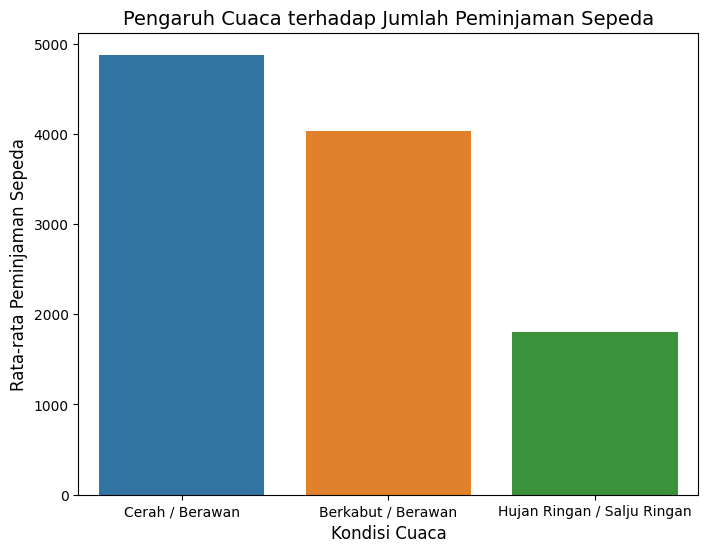

In [21]:

# Mapping kondisi cuaca dari angka ke nama
cuaca_mapping = {
    1: 'Cerah / Berawan',
    2: 'Berkabut / Berawan',
    3: 'Hujan Ringan / Salju Ringan',
    4: 'Hujan Lebat / Badai Salju'
}

# Menghitung rata-rata peminjaman berdasarkan kondisi cuaca
cuaca_impact = day_df.groupby('weathersit')['cnt'].mean().reset_index()

# Mengganti angka dengan nama cuaca
cuaca_impact['weathersit'] = cuaca_impact['weathersit'].map(cuaca_mapping)
cuaca_impact.columns = ['Kondisi Cuaca', 'Rata-rata Peminjaman']

# Plot visualisasi pengaruh cuaca terhadap peminjaman sepeda
plt.figure(figsize=(8, 6))
sns.barplot(x='Kondisi Cuaca', y='Rata-rata Peminjaman', hue='Kondisi Cuaca', data=cuaca_impact, dodge=False, legend=False)
plt.title('Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda', fontsize=14)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Rata-rata Peminjaman Sepeda', fontsize=12)
plt.xticks(rotation=0)
plt.show()


### Pertanyaan 2: Kapan waktu puncak peminjaman sepeda terjadi?

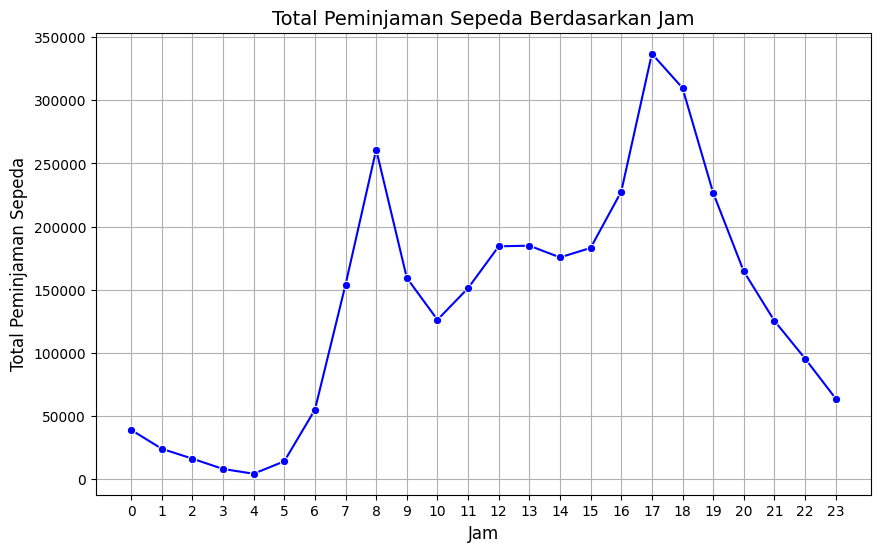

In [22]:

# Menghitung total peminjaman per jam
jam_peminjaman = hour_df.groupby('hr')['cnt'].sum().reset_index()
jam_peminjaman.columns = ['Jam', 'Total Peminjaman']

# Plot visualisasi waktu puncak peminjaman sepeda dengan semua angka jam ditampilkan
plt.figure(figsize=(10, 6))
sns.lineplot(x='Jam', y='Total Peminjaman', data=jam_peminjaman, marker='o', color='blue')
plt.title('Total Peminjaman Sepeda Berdasarkan Jam', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Total Peminjaman Sepeda', fontsize=12)

# Menampilkan semua angka jam dari 0 hingga 23 pada sumbu x
plt.xticks(ticks=range(0, 24), labels=range(0, 24))
plt.grid(True)
plt.show()


### Pertanyaan 3: #

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


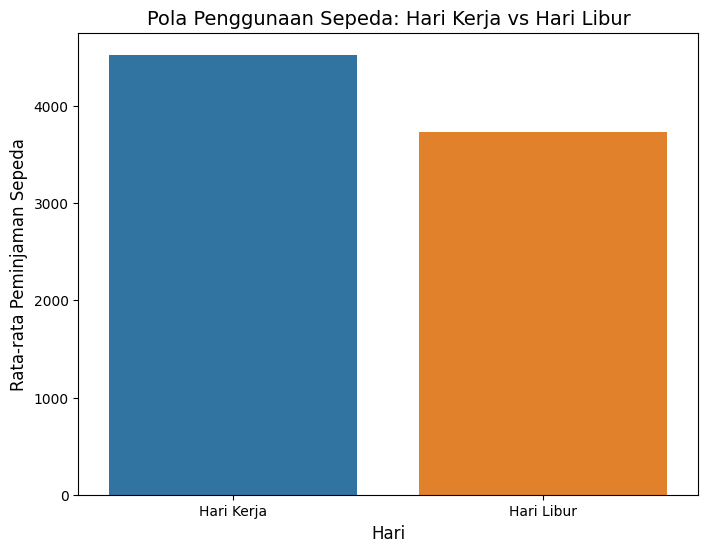

In [23]:


# Mengganti nilai 0 dan 1 pada kolom 'holiday' dengan label yang lebih deskriptif
day_df['holiday_label'] = day_df['holiday'].map({0: 'Hari Kerja', 1: 'Hari Libur'})

# Menghitung rata-rata peminjaman berdasarkan hari kerja dan hari libur
hari_kerja_libur = day_df.groupby('holiday_label')['cnt'].mean().reset_index()
hari_kerja_libur.columns = ['Hari', 'Rata-rata Peminjaman']

# Plot visualisasi pola penggunaan sepeda berdasarkan hari kerja vs hari libur
plt.figure(figsize=(8, 6))
sns.barplot(x='Hari', y='Rata-rata Peminjaman', hue='Hari', data=hari_kerja_libur, dodge=False, legend=False)
plt.title('Pola Penggunaan Sepeda: Hari Kerja vs Hari Libur', fontsize=14)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Rata-rata Peminjaman Sepeda', fontsize=12)
plt.show()


**Insight:**
- Cuaca sangat memengaruhi peminjaman sepeda; cuaca buruk menurunkan minat masyarakat untuk menggunakan sepeda.
- Jam puncak penggunaan sepeda terjadi pada jam sibuk, terutama di sore hari saat jam pulang kerja.
- Hari kerja mendorong lebih banyak peminjaman sepeda dibandingkan dengan hari libur, menunjukkan pola penggunaan sepeda yang lebih fungsional daripada untuk rekreasional pada hari libur.

## Analisis Lanjutan (Opsional)

menghitung analisis lanjutan pada pertanyaan pertama dengan melihat detail dari cuacanya yang lebih berpengaruh

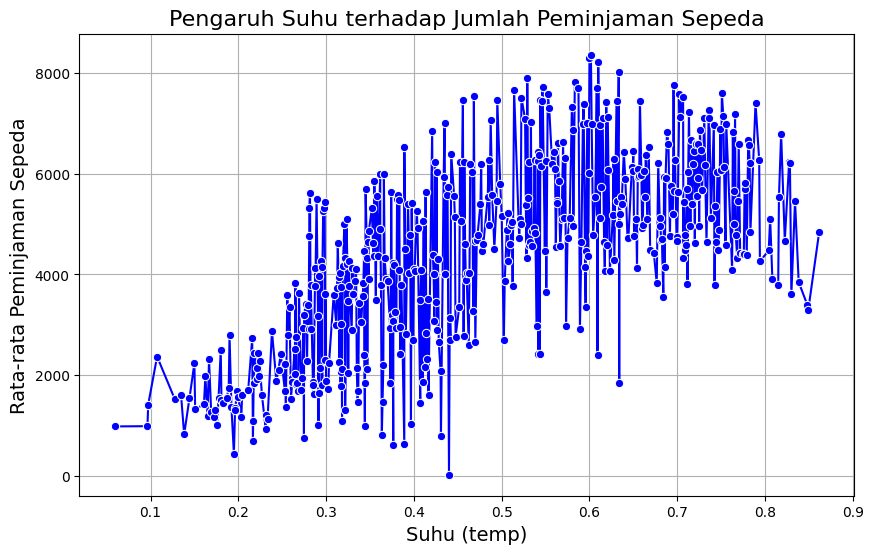

Kesimpulan: Suhu yang paling meningkatkan peminjaman sepeda adalah sekitar 0.60.
Sedangkan suhu yang paling sedikit peminjamannya adalah sekitar 0.44.


In [26]:

# Mengelompokkan data berdasarkan suhu (temp) dan menghitung rata-rata peminjaman sepeda
temp_vs_cnt = day_df.groupby('temp')['cnt'].mean().reset_index()

# Visualisasi pengaruh suhu terhadap peminjaman sepeda
plt.figure(figsize=(10, 6))
sns.lineplot(x='temp', y='cnt', data=temp_vs_cnt, marker='o', color='blue')
plt.title('Pengaruh Suhu terhadap Jumlah Peminjaman Sepeda', fontsize=16)
plt.xlabel('Suhu (temp)', fontsize=14)
plt.ylabel('Rata-rata Peminjaman Sepeda', fontsize=14)
plt.grid(True)
plt.show()

# Kesimpulan Suhu
max_temp = temp_vs_cnt['temp'].iloc[temp_vs_cnt['cnt'].idxmax()]
min_temp = temp_vs_cnt['temp'].iloc[temp_vs_cnt['cnt'].idxmin()]

print(f"Kesimpulan: Suhu yang paling meningkatkan peminjaman sepeda adalah sekitar {max_temp:.2f}.")
print(f"Sedangkan suhu yang paling sedikit peminjamannya adalah sekitar {min_temp:.2f}.")


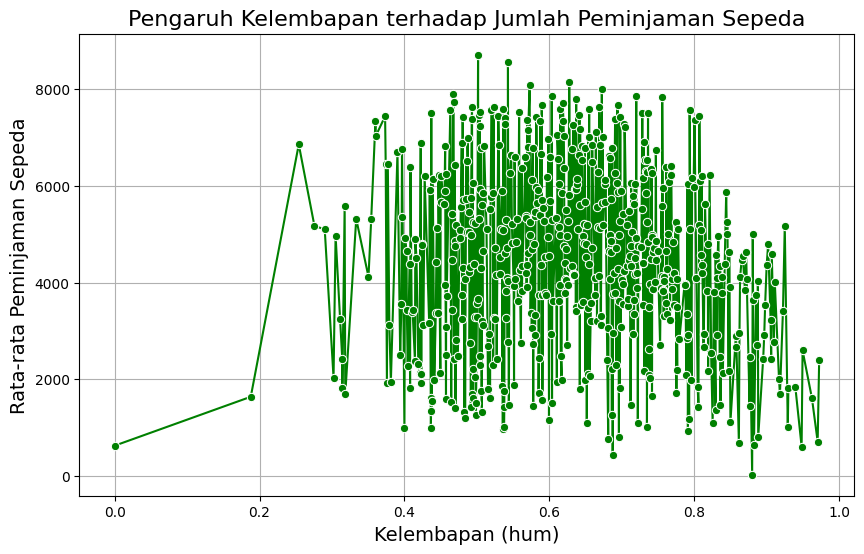

Kesimpulan: Kelembapan yang paling meningkatkan peminjaman sepeda adalah sekitar 0.50.
Sedangkan kelembapan yang paling sedikit peminjamannya adalah sekitar 0.88.


In [27]:
# Mengelompokkan data berdasarkan kelembapan (hum) dan menghitung rata-rata peminjaman sepeda
hum_vs_cnt = day_df.groupby('hum')['cnt'].mean().reset_index()

# Visualisasi pengaruh kelembapan terhadap peminjaman sepeda
plt.figure(figsize=(10, 6))
sns.lineplot(x='hum', y='cnt', data=hum_vs_cnt, marker='o', color='green')
plt.title('Pengaruh Kelembapan terhadap Jumlah Peminjaman Sepeda', fontsize=16)
plt.xlabel('Kelembapan (hum)', fontsize=14)
plt.ylabel('Rata-rata Peminjaman Sepeda', fontsize=14)
plt.grid(True)
plt.show()

# Kesimpulan Kelembapan
max_hum = hum_vs_cnt['hum'].iloc[hum_vs_cnt['cnt'].idxmax()]
min_hum = hum_vs_cnt['hum'].iloc[hum_vs_cnt['cnt'].idxmin()]

print(f"Kesimpulan: Kelembapan yang paling meningkatkan peminjaman sepeda adalah sekitar {max_hum:.2f}.")
print(f"Sedangkan kelembapan yang paling sedikit peminjamannya adalah sekitar {min_hum:.2f}.")


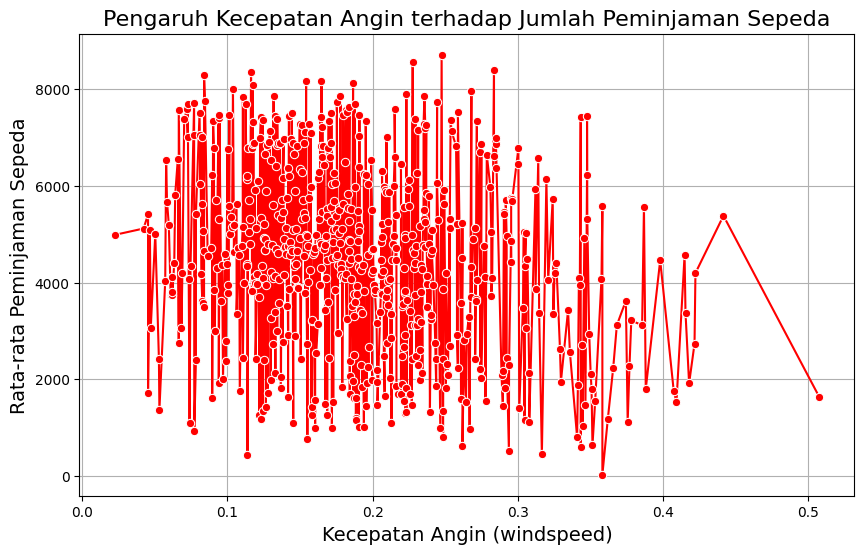

Kesimpulan: Kecepatan angin yang paling meningkatkan peminjaman sepeda adalah sekitar 0.25.
Sedangkan kecepatan angin yang paling sedikit peminjamannya adalah sekitar 0.36.


In [28]:
# Mengelompokkan data berdasarkan kecepatan angin (windspeed) dan menghitung rata-rata peminjaman sepeda
windspeed_vs_cnt = day_df.groupby('windspeed')['cnt'].mean().reset_index()

# Visualisasi pengaruh kecepatan angin terhadap peminjaman sepeda
plt.figure(figsize=(10, 6))
sns.lineplot(x='windspeed', y='cnt', data=windspeed_vs_cnt, marker='o', color='red')
plt.title('Pengaruh Kecepatan Angin terhadap Jumlah Peminjaman Sepeda', fontsize=16)
plt.xlabel('Kecepatan Angin (windspeed)', fontsize=14)
plt.ylabel('Rata-rata Peminjaman Sepeda', fontsize=14)
plt.grid(True)
plt.show()

# Kesimpulan Kecepatan Angin
max_wind = windspeed_vs_cnt['windspeed'].iloc[windspeed_vs_cnt['cnt'].idxmax()]
min_wind = windspeed_vs_cnt['windspeed'].iloc[windspeed_vs_cnt['cnt'].idxmin()]

print(f"Kesimpulan: Kecepatan angin yang paling meningkatkan peminjaman sepeda adalah sekitar {max_wind:.2f}.")
print(f"Sedangkan kecepatan angin yang paling sedikit peminjamannya adalah sekitar {min_wind:.2f}.")


menghitung analisis lanjutan pada pertanyaan kedua dan ketiga untuk wawasan kesimpulan yang lebih luas


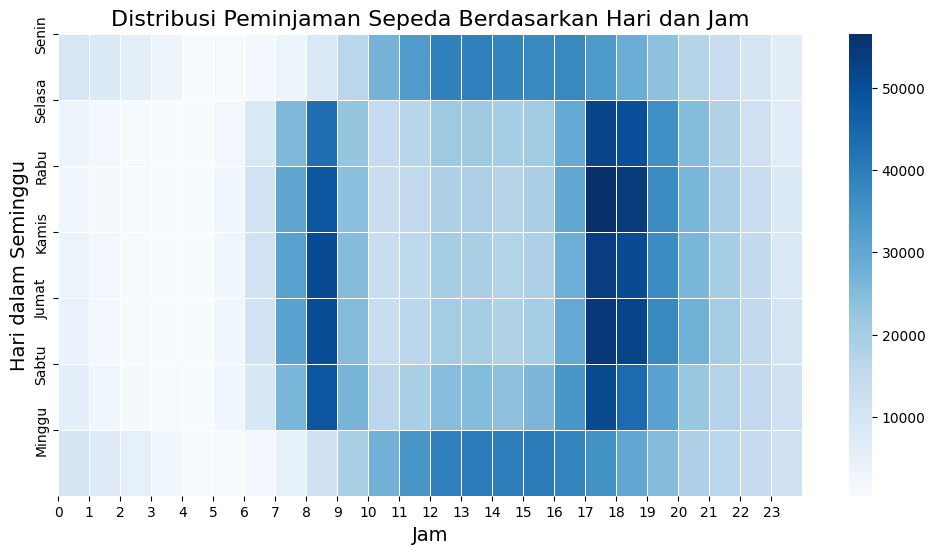

Kesimpulan: Hari dengan jumlah peminjaman terbanyak adalah Sabtu dengan puncak peminjaman terjadi pada jam 17.


In [32]:

# Mengelompokkan data berdasarkan hari dalam seminggu (weekday) dan jam (hr)
hourly_trends = hour_df.groupby(['weekday', 'hr'])['cnt'].sum().unstack()

# Membuat heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_trends, cmap='Blues', annot=False, linewidths=.5)
plt.title('Distribusi Peminjaman Sepeda Berdasarkan Hari dan Jam', fontsize=16)
plt.xlabel('Jam', fontsize=14)
plt.ylabel('Hari dalam Seminggu', fontsize=14)
plt.xticks(ticks=range(0, 24), labels=range(0, 24))  # Menampilkan jam 0-23
plt.yticks(ticks=range(0, 7), labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])  # Hari dalam seminggu
plt.show()

# Kesimpulan dari Heatmap
peak_day = hourly_trends.sum(axis=1).idxmax()
peak_hour = hourly_trends.sum(axis=0).idxmax()

print(f"Kesimpulan: Hari dengan jumlah peminjaman terbanyak adalah {['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'][peak_day]} dengan puncak peminjaman terjadi pada jam {peak_hour}.")


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


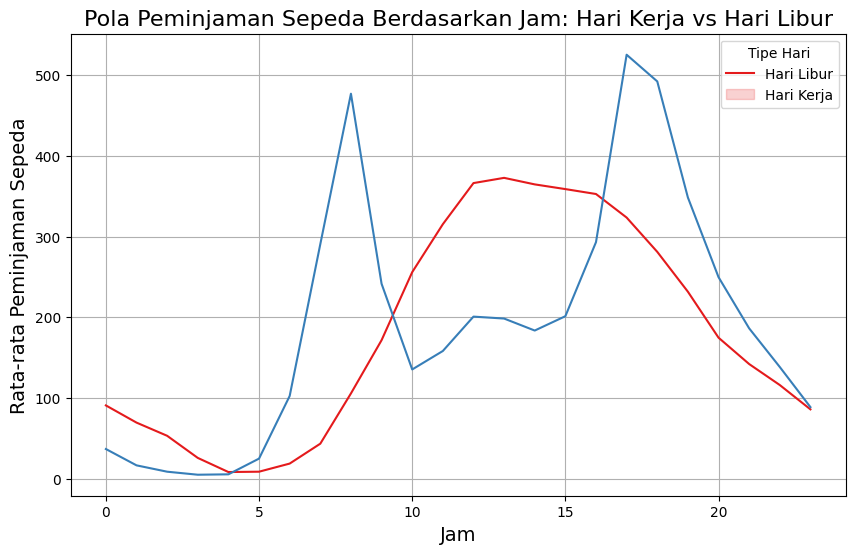

Kesimpulan: Pada hari kerja, puncak peminjaman terjadi pada jam 17.0.
Pada hari libur, puncak peminjaman terjadi pada jam 13.0.


In [33]:
# Mengelompokkan data berdasarkan hari kerja (workingday) dan jam (hr)
workingday_vs_holiday = hour_df.groupby(['workingday', 'hr'])['cnt'].mean().reset_index()

# Membuat plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', hue='workingday', data=workingday_vs_holiday, palette='Set1')
plt.title('Pola Peminjaman Sepeda Berdasarkan Jam: Hari Kerja vs Hari Libur', fontsize=16)
plt.xlabel('Jam', fontsize=14)
plt.ylabel('Rata-rata Peminjaman Sepeda', fontsize=14)
plt.legend(title='Tipe Hari', labels=['Hari Libur', 'Hari Kerja'])
plt.grid(True)
plt.show()

# Kesimpulan dari Perbandingan Hari Kerja vs Hari Libur
peak_workingday = workingday_vs_holiday[workingday_vs_holiday['workingday'] == 1]['cnt'].idxmax()
peak_holiday = workingday_vs_holiday[workingday_vs_holiday['workingday'] == 0]['cnt'].idxmax()

print(f"Kesimpulan: Pada hari kerja, puncak peminjaman terjadi pada jam {workingday_vs_holiday.iloc[peak_workingday]['hr']}.")
print(f"Pada hari libur, puncak peminjaman terjadi pada jam {workingday_vs_holiday.iloc[peak_holiday]['hr']}.")


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

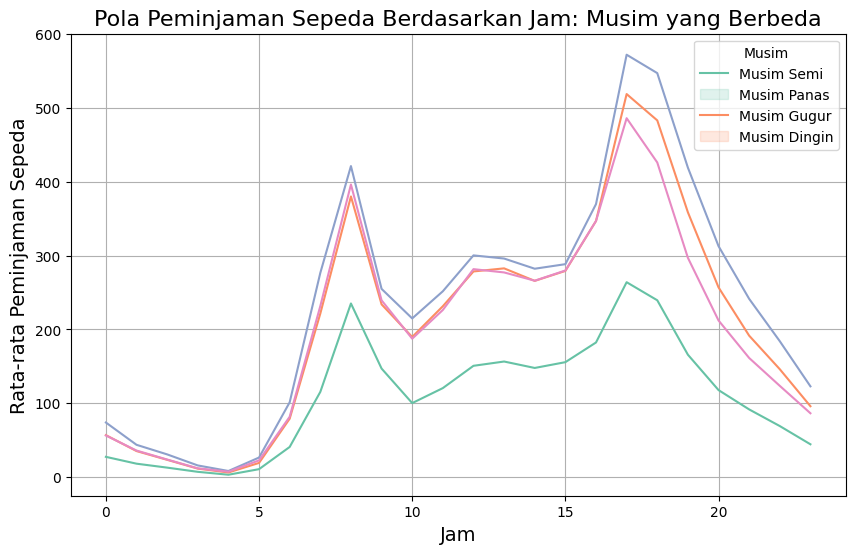

Kesimpulan: Pada musim panas, puncak peminjaman terjadi pada jam 17.0.
Pada musim dingin, puncak peminjaman terjadi pada jam 17.0.


In [34]:
# Mengelompokkan data berdasarkan musim (season) dan jam (hr)
season_vs_hour = hour_df.groupby(['season', 'hr'])['cnt'].mean().reset_index()

# Membuat plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', hue='season', data=season_vs_hour, palette='Set2')
plt.title('Pola Peminjaman Sepeda Berdasarkan Jam: Musim yang Berbeda', fontsize=16)
plt.xlabel('Jam', fontsize=14)
plt.ylabel('Rata-rata Peminjaman Sepeda', fontsize=14)
plt.legend(title='Musim', labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.grid(True)
plt.show()

# Kesimpulan dari Analisis Musiman
peak_summer = season_vs_hour[season_vs_hour['season'] == 2]['cnt'].idxmax()
peak_winter = season_vs_hour[season_vs_hour['season'] == 4]['cnt'].idxmax()

print(f"Kesimpulan: Pada musim panas, puncak peminjaman terjadi pada jam {season_vs_hour.iloc[peak_summer]['hr']}.")
print(f"Pada musim dingin, puncak peminjaman terjadi pada jam {season_vs_hour.iloc[peak_winter]['hr']}.")


## Conclusion

- Conclution pertanyaan 1 : Bagaimana cuaca mempengaruhi peminjaman sepeda?                                         
  Cuaca sangat memengaruhi peminjaman sepeda; cuaca buruk menurunkan minat masyarakat untuk menggunakan sepeda.
Cuaca yang kurang ideal terjadi saat kelembapan tinggi dan kecepatan angin kencang, yang keduanya secara signifikan menurunkan jumlah peminjaman sepeda.

- Conclution pertanyaan 2 : Kapan waktu puncak peminjaman sepedaterjadi?                                            Yaitu pada sore hari  di jam 17.00 Puncak peminjaman sepeda secara umum terjadi pada jam 17:00 di berbagai kondisi (hari kerja, hari libur, musim panas, dan musim dingin). Namun, intensitas peminjaman berbeda tergantung pada hari dan musim.Musim panas lebih mendukung aktivitas bersepeda, meskipun waktu puncak tetap pada sore hari (jam 17:00). Di musim dingin, meskipun jam puncak tetap pada jam yang sama, tapi besar peminjaman menurun karena kondisi cuaca
                         
- Conclution pertanyaan 3 : Bagaimana pola penggunaan sepeda berdasarkan hari kerja vs hari libur?
Pada hari kerja, puncak peminjaman terjadi pada jam 17:00, tepat saat jam pulang kerja, yang menunjukkan bahwa banyak pengguna memanfaatkan sepeda sebagai alat transportasi untuk pulang kerja.            
Pada hari libur, puncak peminjaman terjadi lebih awal, sekitar jam 13:00, mengindikasikan bahwa pengguna lebih aktif di siang hari untuk kegiatan santai.


In [48]:
cuaca_df_cleaned.to_csv("cuaca_df_cleaned.csv", index=False)

In [49]:
waktu_puncak_df_cleaned.to_csv("waktu_puncak_df_cleaned.csv", index=False)

In [50]:
musim_df_cleaned.to_csv("musim_df_cleaned.csv", index=False)